In [102]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder

In [81]:
def read_data():
    df = pd.read_csv("A2.csv")
    df = df.drop(columns=["Unnamed: 0"])
    return df
df_raw = read_data()

def transform_data(df_raw):
    df = df_raw
    # Change columns to boolean
    df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
    df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
    df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
    df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})

    # Change data type of columns 
    df[["gender", "SeniorCitizen", "Partner", "PhoneService", "PaperlessBilling", "Churn", "Dependents"]] = \
        df[["gender", "SeniorCitizen", "Partner", "PhoneService", "PaperlessBilling", "Churn", "Dependents"]].astype(float)

    # Change to float 
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

    # Fill na values with median 
    df["gender"] = df["gender"].fillna(df["gender"].median())
    df["SeniorCitizen"] = df["SeniorCitizen"].fillna(df["SeniorCitizen"].median())
    df["Partner"] = df["Partner"].fillna(df["Partner"].median())
    df["tenure"] = df["tenure"].fillna(df["tenure"].median())
    df["PhoneService"] = df["PhoneService"].fillna(df["PhoneService"].median())
    df["PaperlessBilling"] = df["PaperlessBilling"].fillna(df["PaperlessBilling"].median())
    df["CreditScore"] = df["CreditScore"].fillna(df["CreditScore"].median())
    df["Charge"] = df["Charge"].fillna(df["Charge"].median())
    df["EstimatedSalary"] = df["EstimatedSalary"].fillna(df["EstimatedSalary"].median())
    df["MonthlyCharges"] = df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())
    df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"].median())

    # Drop NaN values in Churn column
    df = df.dropna(subset='Churn')

    df = df.drop(columns=['customerID', 'Surname'])
    return df

df = transform_data(df_raw)

#print(df.info())
#print(df["TotalCharges_check"].value_counts())


In [80]:
#df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7934 non-null   float64
 1   SeniorCitizen     7934 non-null   float64
 2   Partner           7934 non-null   float64
 3   tenure            7934 non-null   float64
 4   PhoneService      7934 non-null   float64
 5   MultipleLines     7867 non-null   object 
 6   InternetService   7881 non-null   object 
 7   OnlineSecurity    7875 non-null   object 
 8   OnlineBackup      7894 non-null   object 
 9   DeviceProtection  7887 non-null   object 
 10  TechSupport       7888 non-null   object 
 11  StreamingTV       7884 non-null   object 
 12  StreamingMovies   7882 non-null   object 
 13  Contract          7886 non-null   object 
 14  PaperlessBilling  7934 non-null   float64
 15  TotalCharges      7934 non-null   float64
 16  Churn             7934 non-null   float64


<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

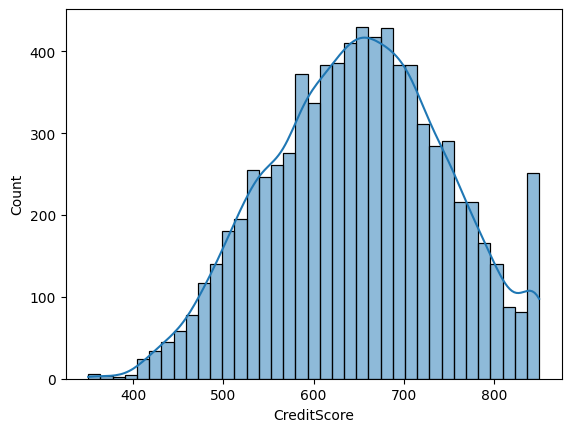

In [91]:
#print(df.head())
#print(df.columns)
import seaborn as sns
sns.histplot(data   = df,
             x      = 'CreditScore',
             kde    = True)

# Select variables - no string

In [82]:
df.columns

x_var = ['gender',
        'SeniorCitizen',
        'Partner',
        'tenure',
        'PhoneService',
        #'MultipleLines',
        #'InternetService',
        #'OnlineSecurity',
        #'OnlineBackup',
        #'DeviceProtection',
        #'TechSupport',
        #'StreamingTV',
        #'StreamingMovies',
        #'Contract',
        'PaperlessBilling', 
        'TotalCharges',
        #'Geography',
        'CreditScore',
        #'EstimatedSalary',
        #'MonthlyCharges',
        #'Dependents',
        #'PaymentMethod',
        'Charge'
        ]



In [75]:
df = df.dropna()
y_data = df.loc[ : , 'Churn']
x_data = df.loc[ : , x_var]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# One-Hot encoding

In [90]:
x_var = ['gender',
        'SeniorCitizen',
        'Partner',
        'tenure',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling', 
        'TotalCharges',
        'Geography',
        'CreditScore',
        'EstimatedSalary',
        'MonthlyCharges',
        'Dependents',
        'PaymentMethod',
        'Charge'
        ]

In [91]:
df = df.dropna()
y_data = df.loc[ : , 'Churn']
x_data = df.loc[ : , x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

In [92]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data[object_cols]))

In [93]:
# One-hot encoding removed index; put it back
OH_cols.index = x_data.index

# Ensure we have proper column names
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)

# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

/var/folders/qz/ybh3b7qd43l25ff6626czkvm0000gn/T/ipykernel_8045/3455292715.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)


In [94]:
x_train, x_test, y_train, y_test = train_test_split(
            OH_X, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

# Linear Regression

In [95]:
# Model initialization
linear_model = LinearRegression()

In [96]:
# Fit the data(train the model)
linear_model.fit(x_train, y_train)

LinearRegression()

In [98]:
coefs = pd.DataFrame(
   np.abs(linear_model[1].coef_),
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

TypeError: 'LinearRegression' object is not subscriptable

In [99]:
# Predict
y_predicted = linear_model.predict(x_test)

In [103]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted).round(3)
r2 = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,regression_model.coef_.round(decimals = 2))
print('Intercept:', regression_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.1   0.64 -0.14 -0.07 -0.51  0.66  0.   -0.    0.02]]
Intercept: [-0.2]
Root mean squared error:  0.139
R2 score:  0.287


# Logistic Regression model

In [53]:
# Model initialization
regression_model = LogisticRegression()

In [54]:
# Fit the data(train the model)
regression_model.fit(x_train, y_train)

LogisticRegression()

In [55]:
# Predict
y_predicted = regression_model.predict(x_test)

In [56]:
confusion_matrix(y_test, y_predicted)

array([[1195,  133],
       [ 253,  234]])

In [57]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1328
         1.0       0.64      0.48      0.55       487

    accuracy                           0.79      1815
   macro avg       0.73      0.69      0.70      1815
weighted avg       0.77      0.79      0.78      1815



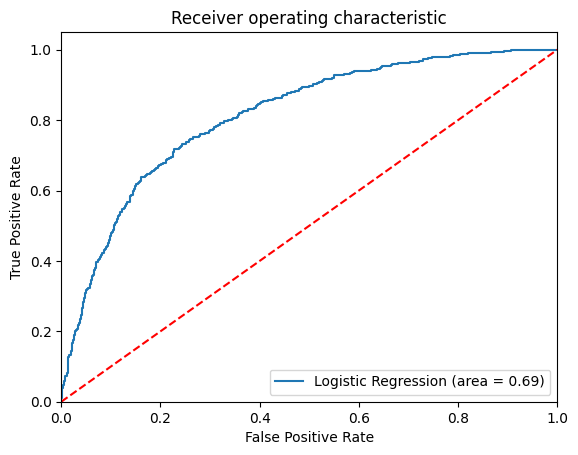

In [58]:
logit_roc_auc = roc_auc_score(y_test, y_predicted)
fpr, tpr, thresholds = roc_curve(y_test, regression_model.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()